<a href="https://colab.research.google.com/github/VijiniEP/DL-Fashion-Classification/blob/main/VGG19.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
# To calculate numerical analysis
import numpy as np
from PIL import Image
# Store or process in the dataframe
import pandas as pd
import glob
import os
import shutil
import sklearn as sklearn
# To get the ploting graphs
import matplotlib.pyplot as plt
# Layers
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
# Sequential model
from tensorflow.keras.models import Sequential
# Utility functions
from tensorflow.keras.utils import to_categorical
 # Train  the test split
from sklearn.model_selection import train_test_split
# Advanced ploting
import seaborn as sns
# Stop the training when there is no improvement in the loss for three consecutive epochs
from keras.callbacks import EarlyStopping
# Metrics for model performance
from sklearn.metrics import classification_report

Step 1: Obtain the dataset. The Fashion MNIST dataset from Kaggle is loaded in the current phase. First, it clears the system of any existing Kaggle configuration files and directories. The Kaggle library is then installed with pip. The Kaggle API credentials file (kaggle.json) is then uploaded, allowing access to the Kaggle dataset. The credentials file is saved in the user's home folder's.kaggle directory, and its permissions are modified. Using the Kaggle datasets download command, the Fashion MNIST dataset is downloaded from Kaggle. Finally, the code unzips the downloaded files and uses the pandas read_csv method to import the train and test datasets.

In [8]:
# If there is any file .kaggle directory remove it or Delete
!rm -r ~/.kaggle

rm: cannot remove '/root/.kaggle': No such file or directory


In [9]:
# Install Kaggle to the working directory
!pip install -q kaggle

In [6]:
# Upload kaggle.json file to the google colab
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (1).json


{'kaggle (1).json': b'{"username":"fathimashamrina","key":"1be6ed9a4e7342df70d488178084db73"}'}

In [10]:
# Save the file in the correct directory
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/

# Change permission of the working directory
!chmod 600 ~/.kaggle/kaggle.json

In [11]:
# Download "Fashion MNIST" dataset from the Kaggle
!kaggle datasets download -d zalando-research/fashionmnist

 99% 68.0M/68.8M [00:02<00:00, 44.6MB/s]
100% 68.8M/68.8M [00:02<00:00, 31.1MB/s]


In [12]:
# Extract files from the fashion.zip file
!unzip -n 'fashionmnist.zip'

Archive:  fashionmnist.zip
  inflating: fashion-mnist_test.csv  
  inflating: fashion-mnist_train.csv  
  inflating: t10k-images-idx3-ubyte  
  inflating: t10k-labels-idx1-ubyte  
  inflating: train-images-idx3-ubyte  
  inflating: train-labels-idx1-ubyte  


In [13]:
# Load Data to the working directory
train = pd.read_csv('fashion-mnist_train.csv', sep=',')
test = pd.read_csv('fashion-mnist_test.csv', sep=',')

Data Visulization After Step 1

In [14]:
# Train the Head of dataset
train.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
# Test the Head of the dataset
test.head(5)

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [16]:
# Print the number of rows and columns in the train and test datasets
print("Fashion MNIST train -  rows:",train.shape[0]," columns:", train.shape[1])
print("Fashion MNIST test -  rows:",test.shape[0]," columns:", test.shape[1])

Fashion MNIST train -  rows: 60000  columns: 785
Fashion MNIST test -  rows: 10000  columns: 785


In [17]:
# Create dictionaries for all labeles
labels = {0 : "T-shirt/top", 1: "Trouser", 2: "Pullover", 3: "Dress", 4: "Coat",
          5: "Sandal", 6: "Shirt", 7: "Sneaker", 8: "Bag", 9: "Ankle Boot"}

# Distribution Method and the Implementation to get classes.
def get_classes_distribution(data):
    # Get the total count for the each label
    label_counts = data["label"].value_counts()

    # Get the total number of samples
    total_samples = len(data)


    # Count the total number of items related to each class
    for i in range(len(label_counts)):
        label = labels[label_counts.index[i]]
        count = label_counts.values[i]
        percent = (count / total_samples) * 100
        print("{:<20s}:   {} or {}%".format(label, count, percent))

# Get the distribution, for the classes by using training dataset
get_classes_distribution(train)

Pullover            :   6000 or 10.0%
Ankle Boot          :   6000 or 10.0%
Shirt               :   6000 or 10.0%
T-shirt/top         :   6000 or 10.0%
Dress               :   6000 or 10.0%
Coat                :   6000 or 10.0%
Sandal              :   6000 or 10.0%
Bag                 :   6000 or 10.0%
Sneaker             :   6000 or 10.0%
Trouser             :   6000 or 10.0%


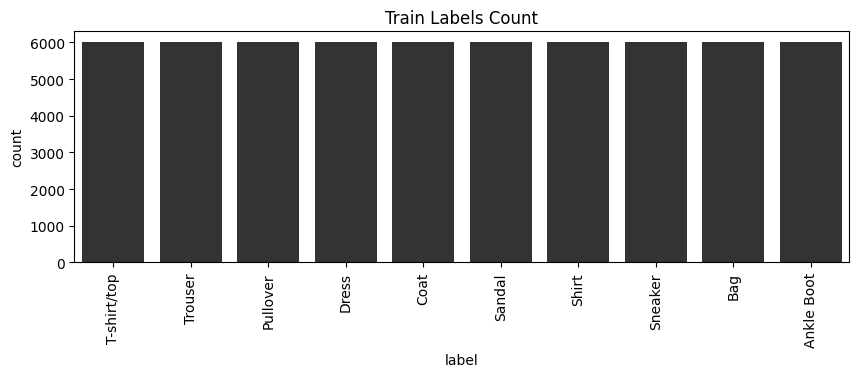

In [18]:
# Plot Labels for the Class Implementation Method for the Training Dataset
def plot_label_per_class(train):
    # Convert trained dataset to the pandas dataframe
    train_df = pd.DataFrame(train)

    # Createing plots
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x='label', data=train_df, palette=['#333333' for i in range(10)])
    plt.xticks(list(labels.keys()), list(labels.values()), rotation='vertical')
    ax.set_title('Train Labels Count')

    plt.show()

# Visualize class distribution by using training dataset
plot_label_per_class(train)

Step 2: Preparing the data The Fashion MNIST dataset is preprocessed in this step. Using Pandas, the picture data and labels are retrieved from the train and test datasets first.

In [19]:
# Calculate distribution of the labeles using testing dataset
get_classes_distribution(test)

T-shirt/top         :   1000 or 10.0%
Trouser             :   1000 or 10.0%
Pullover            :   1000 or 10.0%
Dress               :   1000 or 10.0%
Bag                 :   1000 or 10.0%
Shirt               :   1000 or 10.0%
Sandal              :   1000 or 10.0%
Coat                :   1000 or 10.0%
Sneaker             :   1000 or 10.0%
Ankle Boot          :   1000 or 10.0%


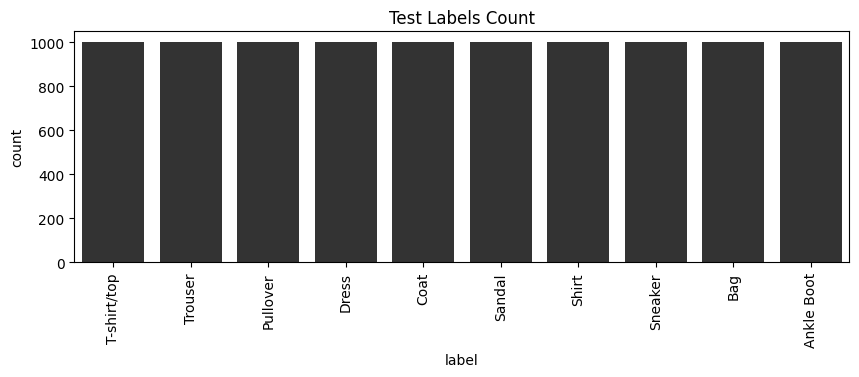

In [20]:
# Plot Label for the each Class Implementation Method for the Testing Dataset
def plot_label_per_class(test):
    # Convert test data to pandas dataframe
    test_df = pd.DataFrame(test)

    # Creating the plot
    plt.figure(figsize=(10, 3))
    ax = sns.countplot(x='label', data=test_df, palette=['#333333' for i in range(10)])
    plt.xticks(list(labels.keys()), list(labels.values()), rotation='vertical')
    ax.set_title('Test Labels Count')

    plt.show()

# Visualize class distribution by using testing dataset
plot_label_per_class(test)

In [21]:
# Rescale to image data
train_images = np.array(train.iloc[:, 1:])
train_labels = np.array(train.iloc[:, 0])
test_images = np.array(test.iloc[:, 1:])
test_labels = np.array(test.iloc[:, 0])

In [22]:
# Reshaping images
new_shape = (64, 64)
x_train_resized = np.zeros((train_images.shape[0], new_shape[0], new_shape[1]))
x_test_resized = np.zeros((test_images.shape[0], new_shape[0], new_shape[1]))

In [23]:
# View Trained data Images
x_train_resized

array([[[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]],

       ...,

       [[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0.

In [24]:
# View Trained Data Labels
train_labels

array([2, 9, 6, ..., 8, 8, 7])

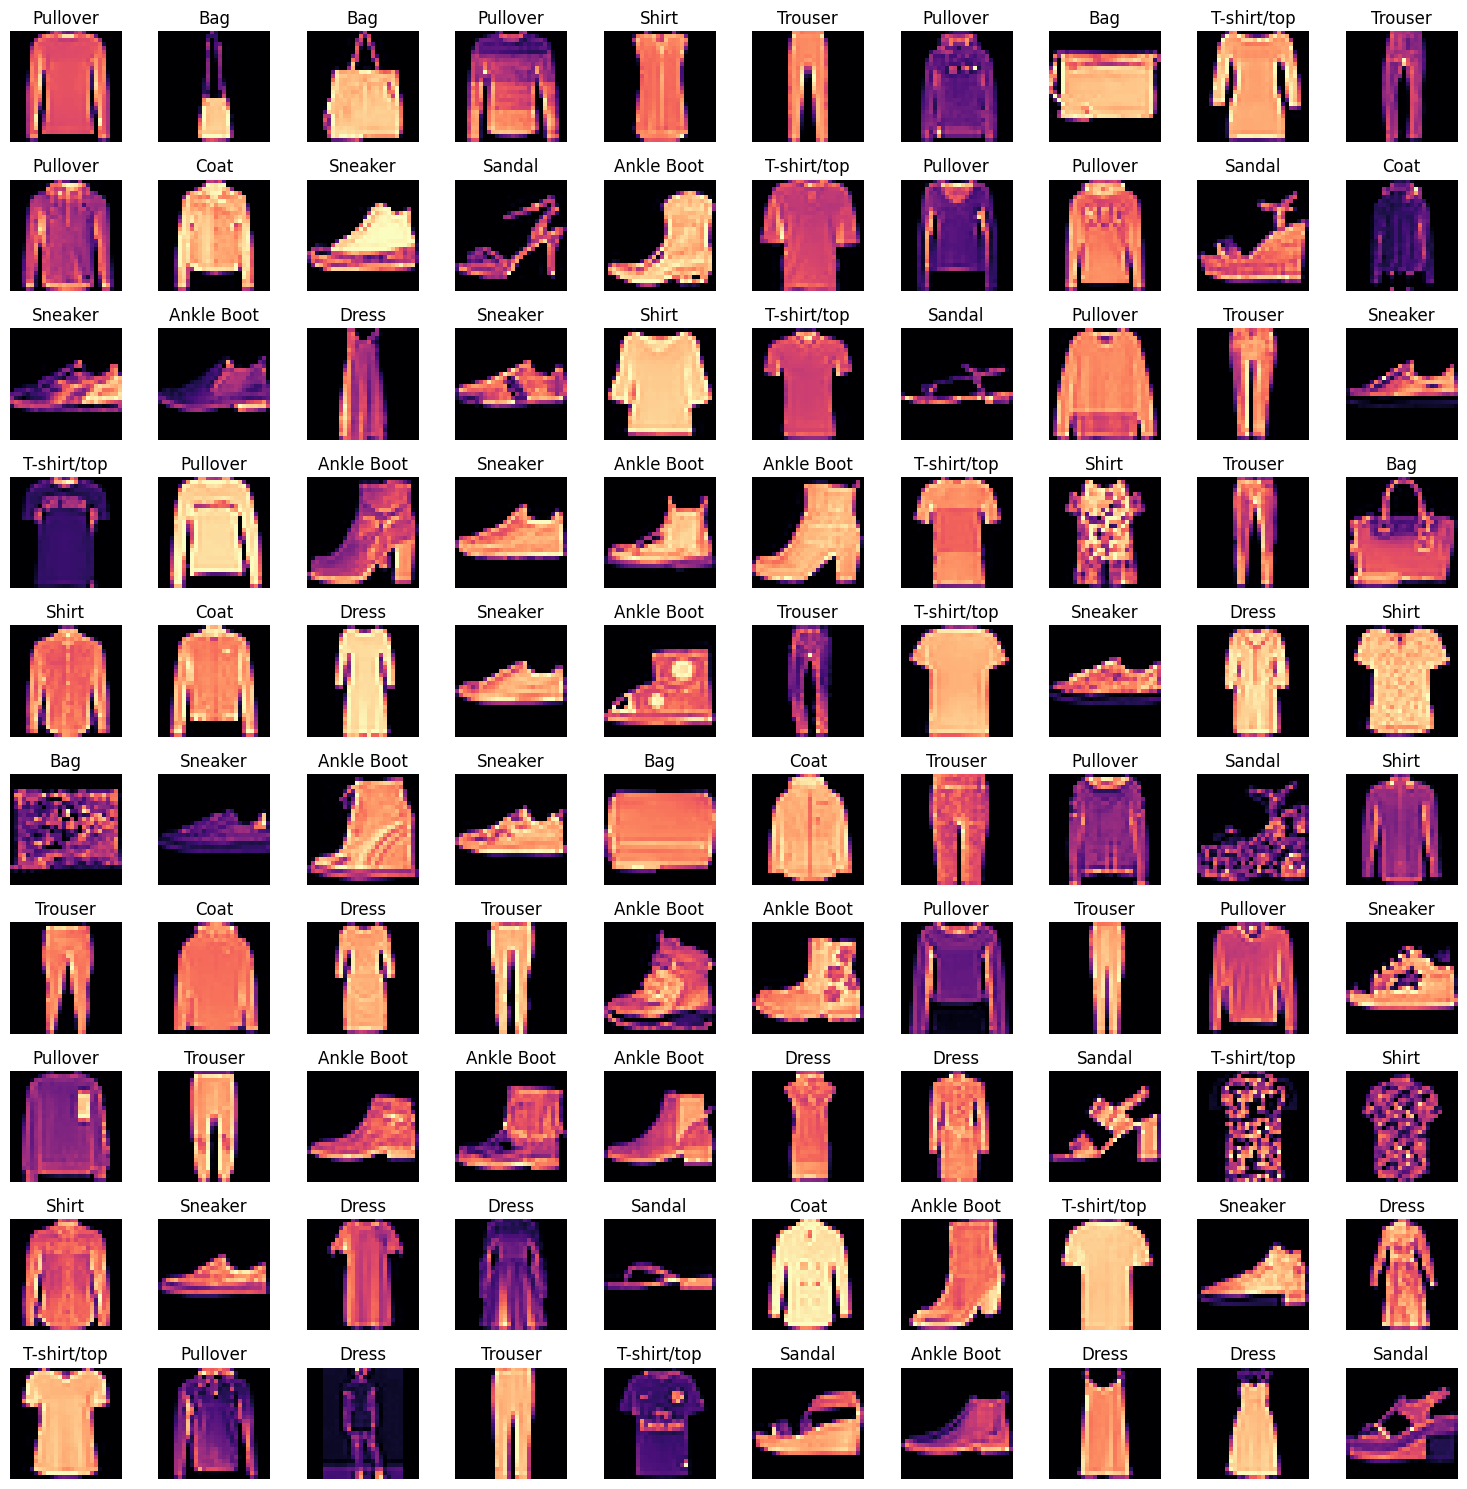

In [25]:
# Data Visualization
# Class Names given from the Dataset
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

# First few trained images with their labels
columns = 10
rows = 10
fig = plt.figure(figsize=(15, 15))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(train_images))
    img = train_images[data_idx].reshape([28,28])
    label = labels[train_labels[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='magma')
    plt.axis('off')
plt.tight_layout()
plt.show()

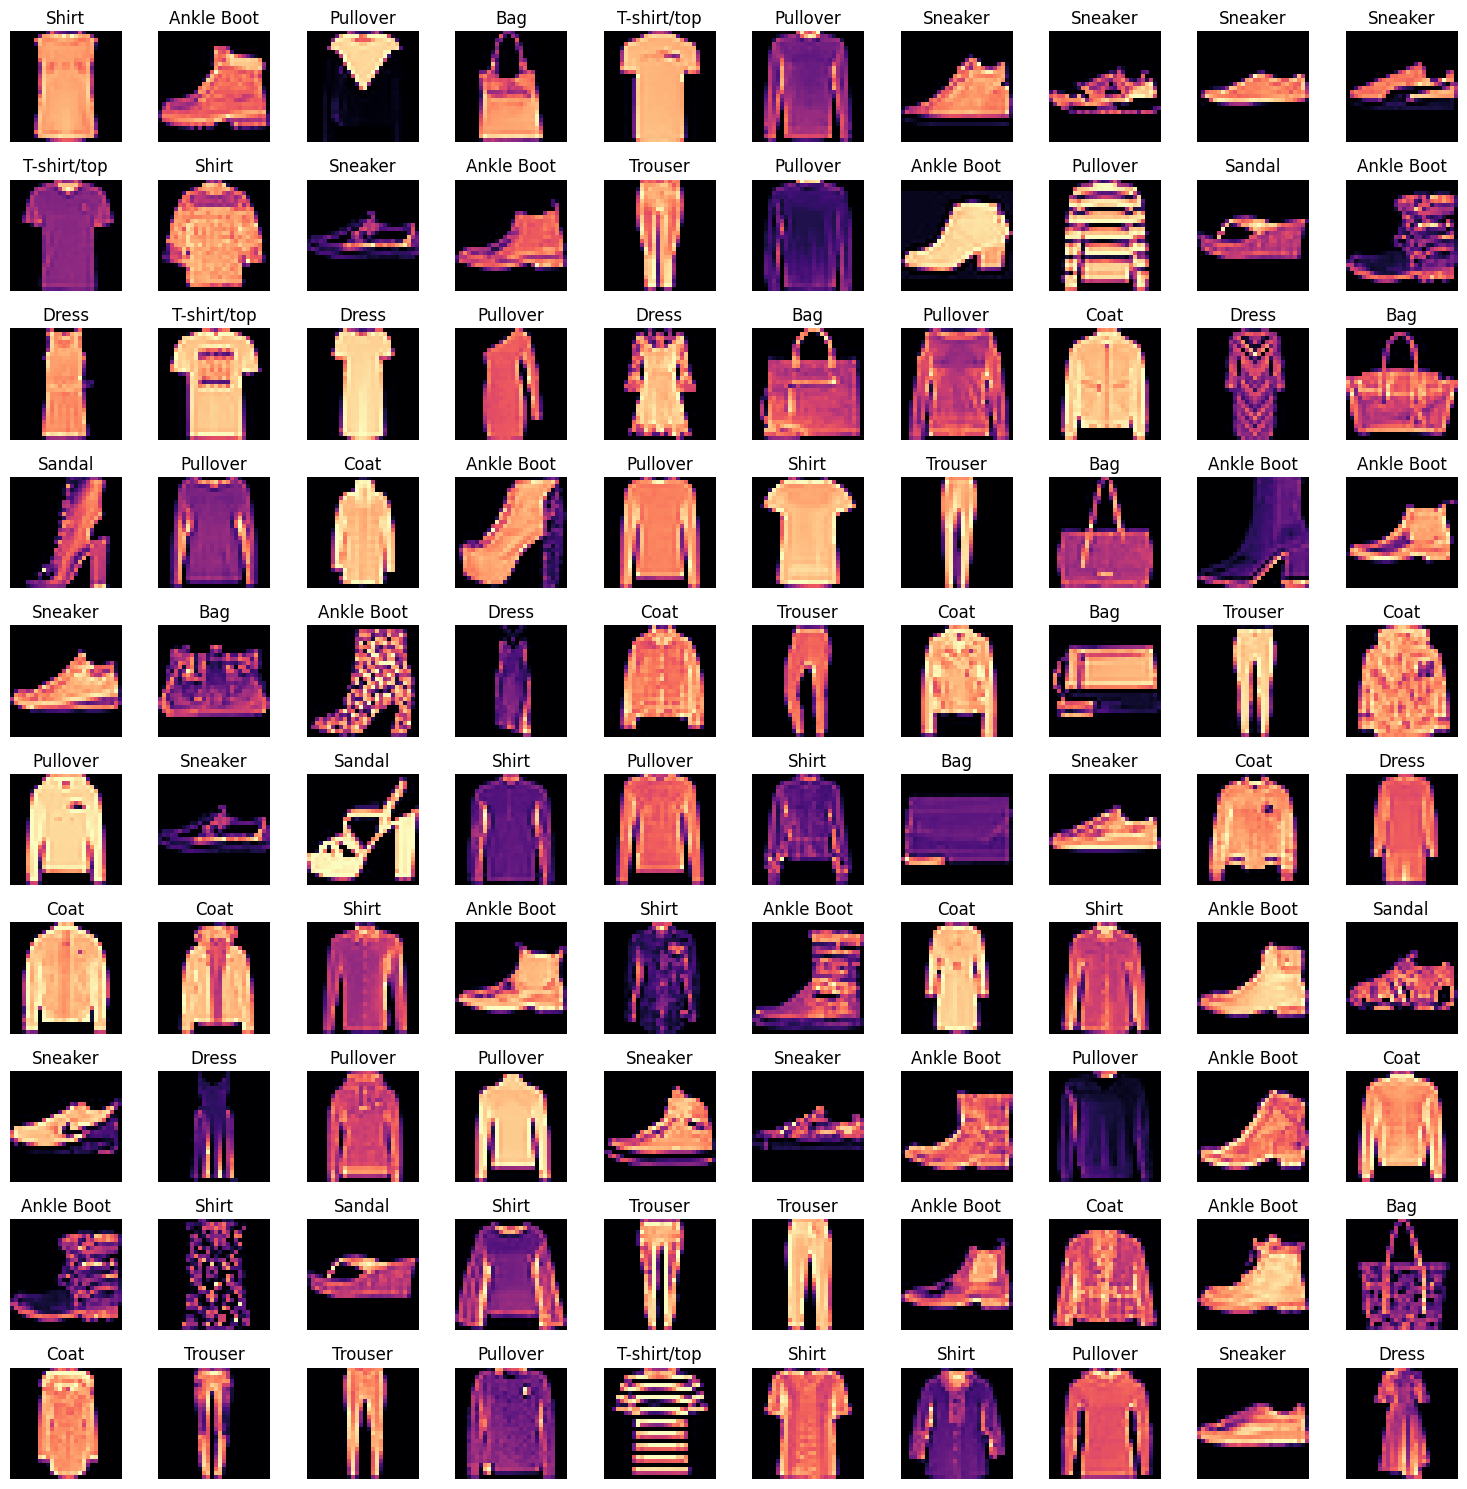

In [26]:
# First few tested images with their labels
columns = 10
rows = 10
fig = plt.figure(figsize=(15, 15))

for i in range(1, columns * rows+1):
    data_idx = np.random.randint(len(test_images))
    img = test_images[data_idx].reshape([28, 28])
    label = labels[test_labels[data_idx]]

    fig.add_subplot(rows, columns, i)
    plt.title(label)
    plt.imshow(img, cmap='magma')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [27]:
# Encoding targets
y_train_enc = to_categorical(train_labels, num_classes=10)
y_test_enc = to_categorical(test_labels, num_classes=10)

In [28]:
#Train the validation split
X_train, X_val, y_train_enc, y_val_enc = train_test_split(x_train_resized, y_train_enc, test_size=0.3)

In [29]:
#Build up the model
def get_model():

    base_model = VGG19(input_shape=(64,64,1), weights=None , include_top=False,classes=10)

    for layer in base_model.layers:
        layer.trainable = False



    x = Flatten()(base_model.output)
    # Add fully connected layers
    x = Dense(64, activation='relu')(x)
    x = Dense(10, activation='softmax')(x)

    model = Model(inputs=base_model.input, outputs=x)
    return model

In [30]:
model = get_model()

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
# View the summary of model
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 64, 64, 1)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        640       
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

In [31]:
# Stop training to avoid overtraining.
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [32]:
# Model Fitting
history = model.fit(X_train, y_train_enc, epochs=6, batch_size=32, verbose=2, callbacks=[early_stopping], validation_data=(X_val, y_val_enc))

Epoch 1/6
1313/1313 - 40s - loss: 2.3028 - accuracy: 0.1006 - val_loss: 2.3027 - val_accuracy: 0.0998 - 40s/epoch - 30ms/step
Epoch 2/6
1313/1313 - 30s - loss: 2.3028 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.0991 - 30s/epoch - 23ms/step
Epoch 3/6
1313/1313 - 28s - loss: 2.3028 - accuracy: 0.0985 - val_loss: 2.3027 - val_accuracy: 0.0983 - 28s/epoch - 22ms/step
Epoch 4/6
1313/1313 - 30s - loss: 2.3028 - accuracy: 0.0990 - val_loss: 2.3028 - val_accuracy: 0.0984 - 30s/epoch - 23ms/step
Epoch 5/6
1313/1313 - 30s - loss: 2.3028 - accuracy: 0.1005 - val_loss: 2.3027 - val_accuracy: 0.0984 - 30s/epoch - 23ms/step
Epoch 6/6
1313/1313 - 29s - loss: 2.3027 - accuracy: 0.0982 - val_loss: 2.3027 - val_accuracy: 0.0984 - 29s/epoch - 22ms/step


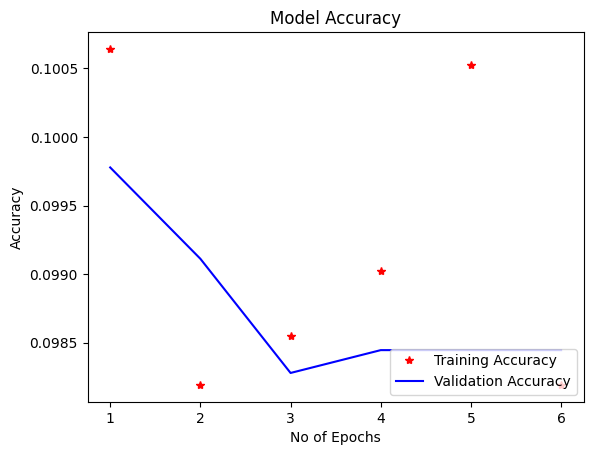

In [33]:
# Data Visualization
# Plot graphs to get the accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, 'r*', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('No of Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.savefig('./vgg19_accuracy_plot.png')
plt.show()

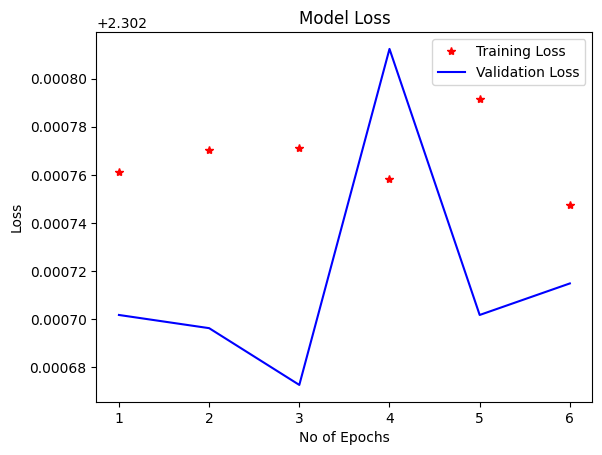

In [34]:
# Data Visualization
# Plot graphs for loss
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'r*', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('No of Epochs')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.savefig('./vgg19_loss_plot.png')
plt.show()

In [35]:
# Predicted values
y_pred = model.predict(X_val)

# Decoding the predicted labels
y_pred = np.argmax(y_pred, axis=1)
y_pred = to_categorical(y_pred , num_classes=10)
print(classification_report(y_val_enc, y_pred, target_names=class_names))

563/563 [==============================] - 8s 14ms/step
              precision    recall  f1-score   support

 T-shirt/top       0.00      0.00      0.00      1820
     Trouser       0.00      0.00      0.00      1769
    Pullover       0.00      0.00      0.00      1796
       Dress       0.00      0.00      0.00      1784
        Coat       0.00      0.00      0.00      1784
      Sandal       0.10      1.00      0.18      1772
       Shirt       0.00      0.00      0.00      1821
     Sneaker       0.00      0.00      0.00      1804
         Bag       0.00      0.00      0.00      1813
  Ankle boot       0.00      0.00      0.00      1837

   micro avg       0.10      0.10      0.10     18000
   macro avg       0.01      0.10      0.02     18000
weighted avg       0.01      0.10      0.02     18000
 samples avg       0.10      0.10      0.10     18000



/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
